### Boolean Indexing

In [1]:
import numpy as np

In [2]:
t = np.linspace(0, 999, 1000)
t.shape, t[:10]

((1000,), array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [4]:
d = np.random.random((100, t.size))
d.shape

(100, 1000)

In [6]:
d[:1, :2]

array([[0.62652052, 0.51855094]])

In [8]:
np.mean(d[:, ((t>=100)  & (t<500))]), d[:, ((t>=100)  & (t<500))].shape

(0.5002242885273397, (100, 400))

In [12]:
# axis=0, when you mean across rows, so, one value per column

a = np.mean(d[:, ((t>=100)  & (t<500))], axis=0).shape
b = np.mean(d[:, ((t>=100)  & (t<500))], axis=1).shape
a, b

((400,), (100,))

In [15]:
import matplotlib.pyplot as plt

In [16]:
# sampling rate
sr = 256
# frequency
f = 10
# time variable
tmax = 2

dt = 1/sr
t = np.arange(0, tmax, dt)
t.shape

(512,)

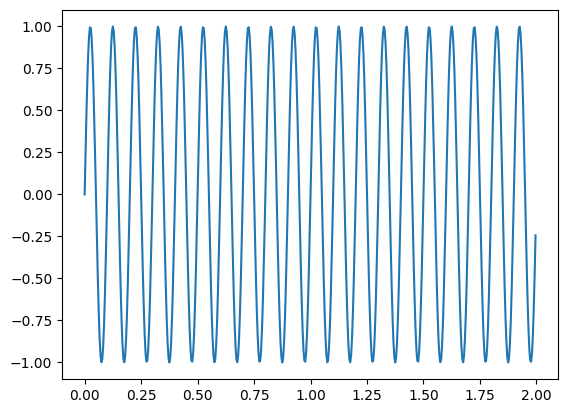

In [17]:
sw = np.sin(2*np.pi*f*t)
plt.plot(t, sw)
plt.show()

In [18]:
sf = np.fft.rfft(sw)
sf.shape

(257,)

In [19]:
fft_sf = np.fft.fft(sw)
fft_sf.shape

(512,)

In [20]:
sf[0]

(-4.323066851918747e-15+0j)

In [22]:
type(sf[0])

numpy.complex128

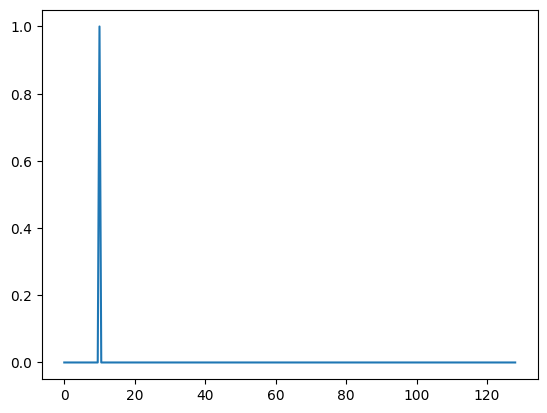

In [33]:
# Normalize based on the size/length of the data
# *2 because of rfft. We basically ditch the imaginary values
amps = 2*(np.abs(sf)/sw.size)
dstep = 1/tmax
freq = np.fft.rfftfreq(sw.size, dt)
plt.plot(freq, amps)
plt.show()

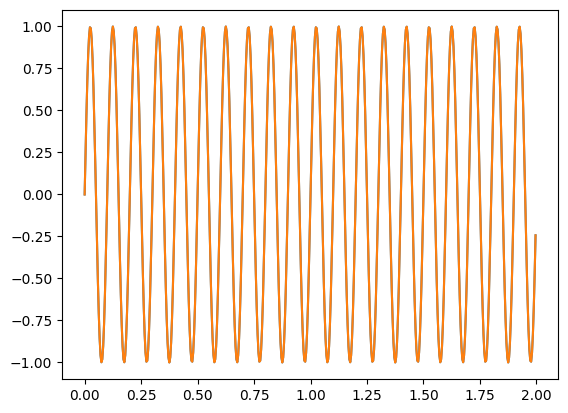

In [34]:
recons = np.fft.irfft(sf)
plt.plot(t, recons)
plt.plot(t, sw)
plt.show()

## Determining freqency resolution

- The freuency rate is determined by how long you take the data.
- The frequency rate sampling is related to the sampleing rate in time domain
- FR = SR/N
- FR = SR/(SR*t)
- FR = 1/t
- Nyquist frequency

In [43]:
sr = 100
f = 10
tmax = 1

dt = 1/sr
t = np.arange(0, tmax, dt)
cw = np.cos(2*np.pi*f*t)

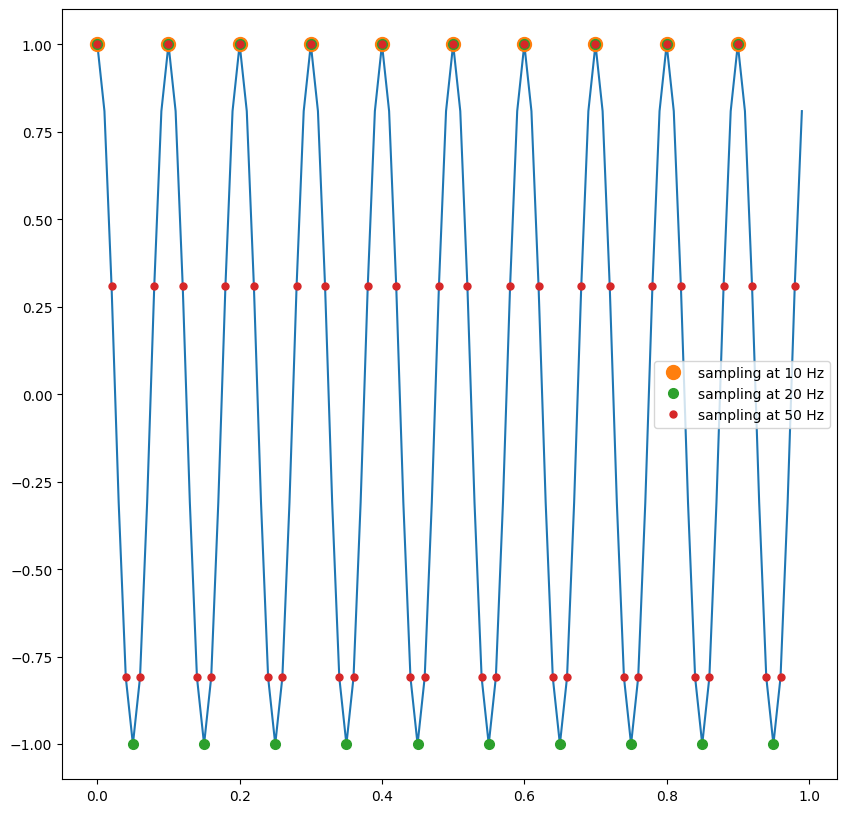

In [49]:
plt.figure(figsize=[10, 10])
plt.plot(t, cw)
plt.plot(t[::10], cw[::10], "o", markersize=10, label="sampling at 10 Hz")
# Nyquist: have to sample at atleast 2*f.
plt.plot(t[::5], cw[::5], "o", markersize=7, label="sampling at 20 Hz")
# Sampling at 50
plt.plot(t[::2], cw[::2], "o", markersize=5, label="sampling at 50 Hz")
plt.legend()
plt.show()